<a href="https://colab.research.google.com/github/alliarnold/71200Project/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2

Loading main libraries and setting up Github repo...

In [56]:
import numpy as np
import pandas as pd

In [57]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [58]:
!git clone https://github.com/alliarnold/71200Project

fatal: destination path '71200Project' already exists and is not an empty directory.


## Step 1&2:

### **Loading & preparing the dataset**

The following steps are to recreate the dataset used in project one, with some adjustments to add additional neighborhood information, and pulling out of the specific month and day of the month into separate columns.

In [59]:
df1 = pd.read_csv('/content/71200Project/BK2-019-Temp-Monitor-pt1.csv', parse_dates=[1])

In [60]:
df2 = pd.read_csv('/content/71200Project/BK2-019-Temp-Monitor-pt2.csv', parse_dates=[1])

In [61]:
df3 = pd.read_csv('/content/71200Project/Locals.csv')

In [62]:
df4 = pd.concat([df1, df2])

In [63]:
#bringing into neighborhood names and their associated median household incomes
tempdf = df4.merge(df3, left_on='Latitude', right_on='Latitude')
tempdf['Longitude'] = tempdf['Longitude_x']
tempdf = tempdf.drop(["Longitude_y", 'Longitude_x'], axis=1)
tempdf.head()

,AirTemp,Day,Hour,Latitude,Install.Type,neighborhood,median_householdinc,Longitude
0,73.942167,2019-08-09,7,40.666205,Street Tree,Brownsville,30733,-73.91691
1,76.666333,2019-08-09,8,40.666205,Street Tree,Brownsville,30733,-73.91691
2,78.691333,2019-08-09,9,40.666205,Street Tree,Brownsville,30733,-73.91691
3,81.472500,2019-08-09,10,40.666205,Street Tree,Brownsville,30733,-73.91691
4,83.571667,2019-08-09,11,40.666205,Street Tree,Brownsville,30733,-73.91691


In [64]:
#making sure all airtemps have values instead of NA's. Already confirmed this was normally distributed in prior project before deciding to use mean instead of median.
tempdf['AirTemp_Mean'] = tempdf['AirTemp'].fillna(tempdf['AirTemp'].mean())

In [65]:
#adding advisory column
conditions = [
    (tempdf['AirTemp_Mean'] < 80),
    (tempdf['AirTemp_Mean'] >= 80) & (tempdf['AirTemp_Mean'] < 90),
    (tempdf['AirTemp_Mean'] >= 90) & (tempdf['AirTemp_Mean'] < 103),
    (tempdf['AirTemp_Mean'] >= 103) & (tempdf['AirTemp_Mean'] < 124),
    (tempdf['AirTemp_Mean'] >= 124)
    ]

# create a list of the values we want to assign for each condition
values = ['Normal', 'Caution', 'Extreme_Caution', 'Danger', 'Extreme_Danger']

# create a new column and use np.select to assign values to it using our lists as arguments

tempdf['Advisory'] = np.select(conditions, values)

# display updated DataFrame
tempdf.head()

,AirTemp,Day,Hour,Latitude,Install.Type,neighborhood,median_householdinc,Longitude,AirTemp_Mean,Advisory
0,73.942167,2019-08-09,7,40.666205,Street Tree,Brownsville,30733,-73.91691,73.942167,Normal
1,76.666333,2019-08-09,8,40.666205,Street Tree,Brownsville,30733,-73.91691,76.666333,Normal
2,78.691333,2019-08-09,9,40.666205,Street Tree,Brownsville,30733,-73.91691,78.691333,Normal
3,81.472500,2019-08-09,10,40.666205,Street Tree,Brownsville,30733,-73.91691,81.472500,Caution
4,83.571667,2019-08-09,11,40.666205,Street Tree,Brownsville,30733,-73.91691,83.571667,Caution


In [66]:
#renaming old "Day" column to Date
tempdf['Date'] = tempdf["Day"]
tempdf.drop(["Day"], axis=1)

,AirTemp,Hour,Latitude,Install.Type,neighborhood,median_householdinc,Longitude,AirTemp_Mean,Advisory,Date
0,73.942167,7,40.666205,Street Tree,Brownsville,30733,-73.916910,73.942167,Normal,2019-08-09
1,76.666333,8,40.666205,Street Tree,Brownsville,30733,-73.916910,76.666333,Normal,2019-08-09
2,78.691333,9,40.666205,Street Tree,Brownsville,30733,-73.916910,78.691333,Normal,2019-08-09
3,81.472500,10,40.666205,Street Tree,Brownsville,30733,-73.916910,81.472500,Caution,2019-08-09
4,83.571667,11,40.666205,Street Tree,Brownsville,30733,-73.916910,83.571667,Caution,2019-08-09
...,...,...,...,...,...,...,...,...,...,...
477571,63.861167,16,40.663847,Street Tree,Brownsville,30733,-73.908308,63.861167,Normal,2019-10-15
477572,63.782667,17,40.663847,Street Tree,Brownsville,30733,-73.908308,63.782667,Normal,2019-10-15
477573,62.318667,18,40.663847,Street Tree,Brownsville,30733,-73.908308,62.318667,Normal,2019-10-15
477574,60.682333,19,40.663847,Street Tree,Brownsville,30733,-73.908308,60.682333,Normal,2019-10-15


In [67]:
#pulling out month and day into their own columns
tempdf['Month'] = tempdf['Date'].dt.month
tempdf['Day'] = tempdf['Date'].dt.day

In [68]:
#reorder final list of columns
tempdf2 = tempdf[["Date", "Month", "Day", "Hour", "AirTemp_Mean", "AirTemp", "Advisory", "Latitude", "Longitude", "neighborhood","median_householdinc", "Install.Type" ]]
tempdf2.head()

,Date,Month,Day,Hour,AirTemp_Mean,AirTemp,Advisory,Latitude,Longitude,neighborhood,median_householdinc,Install.Type
0,2019-08-09,8,9,7,73.942167,73.942167,Normal,40.666205,-73.91691,Brownsville,30733,Street Tree
1,2019-08-09,8,9,8,76.666333,76.666333,Normal,40.666205,-73.91691,Brownsville,30733,Street Tree
2,2019-08-09,8,9,9,78.691333,78.691333,Normal,40.666205,-73.91691,Brownsville,30733,Street Tree
3,2019-08-09,8,9,10,81.472500,81.472500,Caution,40.666205,-73.91691,Brownsville,30733,Street Tree
4,2019-08-09,8,9,11,83.571667,83.571667,Caution,40.666205,-73.91691,Brownsville,30733,Street Tree


Here I'm splitting my target from my features for later ease.

In [69]:
features = tempdf2.drop(['Advisory', 'AirTemp', 'AirTemp_Mean'], axis=1)
print(features)

             Date  Month  Day  Hour   Latitude  Longitude neighborhood  \
0      2019-08-09      8    9     7  40.666205 -73.916910  Brownsville   
1      2019-08-09      8    9     8  40.666205 -73.916910  Brownsville   
2      2019-08-09      8    9     9  40.666205 -73.916910  Brownsville   
3      2019-08-09      8    9    10  40.666205 -73.916910  Brownsville   
4      2019-08-09      8    9    11  40.666205 -73.916910  Brownsville   
...           ...    ...  ...   ...        ...        ...          ...   
477571 2019-10-15     10   15    16  40.663847 -73.908308  Brownsville   
477572 2019-10-15     10   15    17  40.663847 -73.908308  Brownsville   
477573 2019-10-15     10   15    18  40.663847 -73.908308  Brownsville   
477574 2019-10-15     10   15    19  40.663847 -73.908308  Brownsville   
477575 2019-10-15     10   15    20  40.663847 -73.908308  Brownsville   

        median_householdinc Install.Type  
0                     30733  Street Tree  
1                     307

In [70]:
target = tempdf[['Advisory', 'AirTemp_Mean']]
print(target)

       Advisory  AirTemp_Mean
0        Normal     73.942167
1        Normal     76.666333
2        Normal     78.691333
3       Caution     81.472500
4       Caution     83.571667
...         ...           ...
477571   Normal     63.861167
477572   Normal     63.782667
477573   Normal     62.318667
477574   Normal     60.682333
477575   Normal     60.260000

[477576 rows x 2 columns]


### **One Hot Encoding**

This time around I am also going create a version of the data with dummies for the categorical data--doing encoding for both features and targets.

In [71]:
print("Original features:\n", list(features.columns), "\n")

Original features:
 ['Date', 'Month', 'Day', 'Hour', 'Latitude', 'Longitude', 'neighborhood', 'median_householdinc', 'Install.Type'] 



In [72]:
# one-hot encoding using get_dummies
data_dummies = pd.get_dummies(features, dtype=int)
#see results check that it is done correctly
print("Features after get_dummies:\n", list(data_dummies.columns))

Features after get_dummies:
 ['Date', 'Month', 'Day', 'Hour', 'Latitude', 'Longitude', 'median_householdinc', 'neighborhood_Bed-Stuy', 'neighborhood_Brownsville', 'neighborhood_Carroll Gardens', 'neighborhood_East Flatbush', 'neighborhood_East New York', 'neighborhood_Flatbush', 'neighborhood_Gowanus', 'Install.Type_Light Pole', 'Install.Type_Street Tree']


### **LabelEncoder**

This encodes labels that were in the target data with values from 0 through nth class (0 through 3 here).

In [73]:
## checking here to see if I'm going to need to stratify my data when I split for testing an training sets
target['Advisory'].value_counts()

Advisory
Normal             335605
Caution            115337
Extreme_Caution     26218
Danger                416
Name: count, dtype: int64

In [74]:
!pip install -U scikit-learn==1.4

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
# 'Advisory' is the target
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target['Advisory'])

print(target_encoded)

[3 3 3 ... 3 3 3]


In [77]:
from typing import OrderedDict
tencode2 = label_encoder.fit_transform(target['Advisory'])

### **Testing & Training Data Split**

As seen above my target data on how safe it is outside (the advisory) is not evenly split between the overall data so I need to do a stratified testing and training dataset.

In [78]:
X = data_dummies
y = target_encoded
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (477576, 16) y.shape: (477576,)


In [79]:
#below K-nearest neighbors wasn't working because of issue with datatypes
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477576 entries, 0 to 477575
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date                          477576 non-null  datetime64[ns]
 1   Month                         477576 non-null  int32         
 2   Day                           477576 non-null  int32         
 3   Hour                          477576 non-null  int64         
 4   Latitude                      477576 non-null  float64       
 5   Longitude                     477576 non-null  float64       
 6   median_householdinc           477576 non-null  int64         
 7   neighborhood_Bed-Stuy         477576 non-null  int64         
 8   neighborhood_Brownsville      477576 non-null  int64         
 9   neighborhood_Carroll Gardens  477576 non-null  int64         
 10  neighborhood_East Flatbush    477576 non-null  int64         
 11  neighborhood_

In [80]:
# The datetime64 datatype on 'Date' column seems to be the issue.
# All entries are from the same year, and I have month, day, and hour columns
# So I decide to drop the "Date" column from my X data
X = X.drop('Date', axis=1)
X.head()

,Month,Day,Hour,Latitude,Longitude,median_householdinc,neighborhood_Bed-Stuy,neighborhood_Brownsville,neighborhood_Carroll Gardens,neighborhood_East Flatbush,neighborhood_East New York,neighborhood_Flatbush,neighborhood_Gowanus,Install.Type_Light Pole,Install.Type_Street Tree
0,8,9,7,40.666205,-73.91691,30733,0,1,0,0,0,0,0,0,1
1,8,9,8,40.666205,-73.91691,30733,0,1,0,0,0,0,0,0,1
2,8,9,9,40.666205,-73.91691,30733,0,1,0,0,0,0,0,0,1
3,8,9,10,40.666205,-73.91691,30733,0,1,0,0,0,0,0,0,1
4,8,9,11,40.666205,-73.91691,30733,0,1,0,0,0,0,0,0,1


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=15, test_size=0.2)

In [83]:
# Confirming that the stratification worked

def get_value_counts(array):
  unique, counts = np.unique(array, return_counts=True)
  total_count = counts.sum()
  percent = counts / total_count

  print("Unique Values:", unique)
  print("Counts:", counts)
  print("Proportion:", percent)

print("", 'Test Distribution')
get_value_counts(y_test)
print("", 'Training Distribution')
get_value_counts(y_train)

 Test Distribution
Unique Values: [0 1 2 3]
Counts: [23068    83  5244 67121]
Proportion: [0.24150928 0.00086896 0.0549018  0.70271996]
 Training Distribution
Unique Values: [0 1 2 3]
Counts: [ 92269    333  20974 268484]
Proportion: [0.24150395 0.00087159 0.05489714 0.70272732]


## Step 3:

### **Examining the target attribute**

In the chart below, I explore to see if the target attribute is evenly distributed. Because the temperature data was normally distributed, I expect the "Normal" will be disproportionally represented.

<ipython-input-84-78a879e11ad4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=y, palette="Set2", order=plot_order)


<Axes: ylabel='count'>

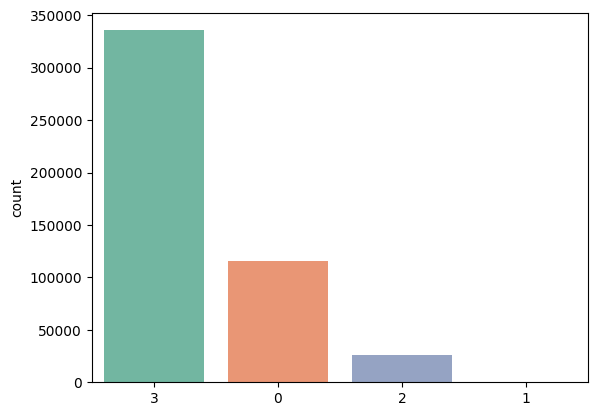

In [84]:
import seaborn as sb

plot_order = [3,0,2,1]

# Reference:
#3 = Normal
#0 = Caution
#2 = Extreme Caution
#1 = Danger

sb.countplot(x=y, palette="Set2", order=plot_order)

## Step 4&5:

### **Select and apply supervised learning models**

For these steps I decided to do a k-nearest neighbors model and a decision treat model.

In [85]:
import os

In [86]:
!pip install mglearn

### **K-Nearest Neighbors Model**

Running with default parameters, training on training set and testing on the testing set. Calculate:
  * Precision
  * Recall
  * F1

In [87]:
# Training on training set and testing on testing set

from sklearn.neighbors import KNeighborsClassifier
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print("Test set accuracy: {:.4f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.9309


In [88]:
from sklearn.metrics import classification_report

#3 = Normal
#0 = Caution
#2 = Extreme Caution
#1 = Danger

print(classification_report(y_test, knn.predict(X_test),
                            target_names=["class 0 CAUTION",
                                          "class 1 DANGER",
                                          "class 2 EX. CAUTION",
                                          "class 3 NORMAL",
                                          ]))

                     precision    recall  f1-score   support

    class 0 CAUTION       0.86      0.86      0.86     23068
     class 1 DANGER       0.48      0.34      0.40        83
class 2 EX. CAUTION       0.76      0.73      0.75      5244
     class 3 NORMAL       0.97      0.97      0.97     67121

           accuracy                           0.93     95516
          macro avg       0.77      0.73      0.74     95516
       weighted avg       0.93      0.93      0.93     95516



Running with default parameters on whole dataset. Calculate:
  * Precision
  * Recall
  * F1

In [89]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores_all = cross_val_score(knn_cv, X, y, cv=5)

print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all)))

cv_scores:
[0.932315   0.90835994 0.86394807 0.89104329 0.93644977]
cv_scores mean:
0.9064232166361205


**Adjusting first param** for each model using grid search. Beginning with number of neighbors. Starting by iterating through k values of 1 through 10, building and testing a k-nearest neighbors model for each value.

In [90]:
from sklearn.model_selection import GridSearchCV

# parameter validation on training set

knn2 = KNeighborsClassifier()

In [91]:
#dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 11)}

#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [92]:
#best performing k (on training set)
knn_gscv.best_params_

{'n_neighbors': 7}

In [93]:
#Accuracy of best performing k
knn_gscv.best_score_

0.9365649374443805

In [94]:
#Cross validation results
knn_gscv.cv_results_

{'mean_fit_time': array([0.96895733, 0.96871262, 0.97204213, 0.98117428, 0.96117172,
        0.96800218, 0.97184181, 0.98126163, 0.96497402, 0.96799741]),
 'std_fit_time': array([0.02026295, 0.01376538, 0.02521407, 0.0332223 , 0.01163253,
        0.01951242, 0.0046011 , 0.05005599, 0.01904014, 0.01273846]),
 'mean_score_time': array([7.1974268 , 7.62417879, 7.84121346, 8.09725561, 8.23031583,
        8.44735379, 8.65713253, 8.84733343, 9.08886838, 9.27448697]),
 'std_score_time': array([0.12548881, 0.09092602, 0.13003348, 0.16277167, 0.10291571,
        0.15226974, 0.12888318, 0.08983412, 0.08637199, 0.023604  ]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},


**Second param adjustment** will be for distance computation. The next cells test the "manhattan" metric to see how it compares to the default distance euclidian distance measurement.

In [96]:
import matplotlib.pyplot as plt

In [98]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

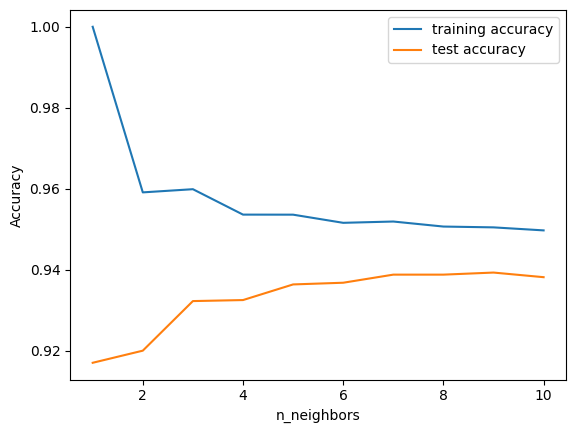

In [99]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [100]:
#dictionary of all values of k
param_grid_knn_manhattan = {"n_neighbors": np.arange(1, 11), 'metric':['manhattan']}

#grid search on all values of k in dictionary
knn_gscv_manhattan = GridSearchCV(knn, param_grid_knn_manhattan, cv=5)
knn_gscv_manhattan.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=10),
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [101]:
#best performing k (on training set)
knn_gscv_manhattan.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [102]:
# accuracy of k = 1 with manhattan distance on testing data
knn1_manhattan = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn1_manhattan.fit(X_train, y_train)
print("knn score: {}".format(knn1_manhattan.score(X_test, y_test)))

knn score: 0.9169877298044307


The KNN model with K=3 and using the Manhattan distance parameter gives an accuracy of 91.7% on the test data compared to 93.66% on the K=7 model using Euclidian distance.

### **Decision Tree Model**

In [103]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 0 CAUTION",
                                          "class 1 DANGER",
                                          "class 2 EX. CAUTION",
                                          "class 3 NORMAL"]))

Accuracy on training set: 1.000
Accuracy on test set: 0.939
                     precision    recall  f1-score   support

    class 0 CAUTION       0.88      0.87      0.88     23068
     class 1 DANGER       0.72      0.72      0.72        83
class 2 EX. CAUTION       0.78      0.79      0.79      5244
     class 3 NORMAL       0.97      0.97      0.97     67121

           accuracy                           0.94     95516
          macro avg       0.84      0.84      0.84     95516
       weighted avg       0.94      0.94      0.94     95516



In [104]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.18332466 0.34802258 0.27709383 0.07628394 0.0823364  0.00376601
 0.00070441 0.00121215 0.00049878 0.00090597 0.00068281 0.00088265
 0.00094434 0.01305072 0.01029076]


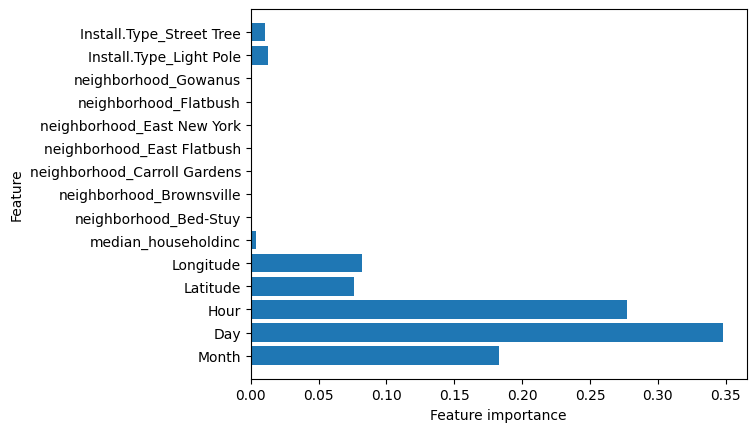

In [106]:
# plot feature importances
# assume the dataset has been imported as dataset
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

In [107]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.18332466 0.34802258 0.27709383 0.07628394 0.0823364  0.00376601
 0.00070441 0.00121215 0.00049878 0.00090597 0.00068281 0.00088265
 0.00094434 0.01305072 0.01029076]


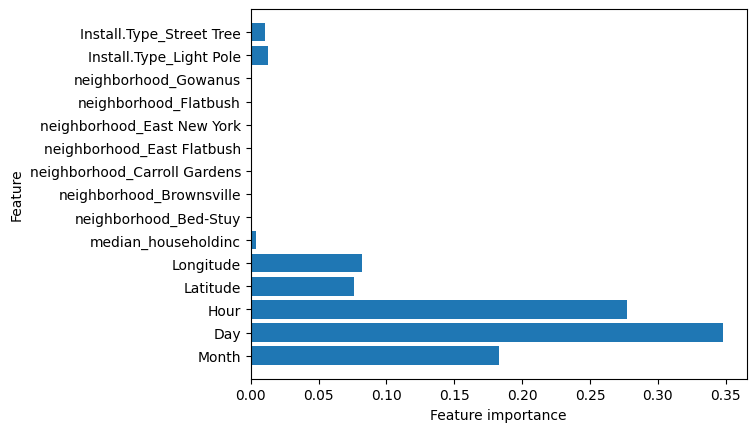

In [109]:
# plot feature importances

plot_feature_importances(tree)